In [57]:
# importar pandas
import pandas as pd

# Regplot para fazer análise da relação linear
from seaborn import regplot

# Manipulação de textos
import textcleaner as tc

# Sentimentos
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Iniciar VADER
VADER = SentimentIntensityAnalyzer()

In [61]:
# Ler e printar dados
Dados = pd.read_csv("Data\Base_Completa.csv", sep=";", index_col="Horario")
Dados.head()

,Tweets,Sentimento,Close,Retornos
Horario,,,,
2022-03-02 03:00:00+00:00,RT @WatcherGuru: BREAKING: Airbnb CEO says the...,0.5994,44370.246094,NaN
2022-03-02 03:00:00+00:00,RT @nima33514465: @BluesparrowC @TheMoonCarl @...,0.3612,44370.246094,NaN
2022-03-02 03:00:00+00:00,RT @ICOAnnouncement: 🎙 New Featured Project\r\...,0.5859,44370.246094,NaN
2022-03-02 03:00:00+00:00,RT @AirdropStario: 💧 Farcana Airdrop 💧\r\n\r\n...,0.4753,44370.246094,NaN
2022-03-02 03:00:00+00:00,RT @AirdropStario: 💧 Farcana Airdrop 💧\r\n\r\n...,0.4753,44370.246094,NaN


In [62]:
# Adicionar Coluna de Tweets Preprocessados
Tweets_PreProcessados = Dados["Tweets"].apply(tc.main_cleaner)
Dados["Tweets_PreProcessados"] = Tweets_PreProcessados.values
Dados["Tweets_PreProcessados"] = Dados["Tweets_PreProcessados"].str.join(" ")

In [63]:
# Criar Lista com Sentimentos Pré processados
Sentimentos_PreProcessados = []
for row in range(Dados.shape[0]):
    Sentimentos_PreProcessados.append(VADER.polarity_scores(Dados["Tweets_PreProcessados"].values[row])["compound"])

Dados["Sentimentos_PreProcessados"] = Sentimentos_PreProcessados

In [64]:
# Transformar o índice em objeto de datas (DateTime)
Dados.index = pd.to_datetime(Dados.index)
Dados.index

DatetimeIndex(['2022-03-02 03:00:00+00:00', '2022-03-02 03:00:00+00:00',
               '2022-03-02 03:00:00+00:00', '2022-03-02 03:00:00+00:00',
               '2022-03-02 03:00:00+00:00', '2022-03-02 03:00:00+00:00',
               '2022-03-02 03:00:00+00:00', '2022-03-02 03:00:00+00:00',
               '2022-03-02 03:00:00+00:00', '2022-03-02 03:00:00+00:00',
               ...
               '2022-04-06 02:00:00+00:00', '2022-04-06 02:00:00+00:00',
               '2022-04-06 02:00:00+00:00', '2022-04-06 02:00:00+00:00',
               '2022-04-06 02:00:00+00:00', '2022-04-06 02:00:00+00:00',
               '2022-04-06 02:00:00+00:00', '2022-04-06 02:00:00+00:00',
               '2022-04-06 02:00:00+00:00', '2022-04-06 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Horario', length=93178, freq=None)

In [65]:
# Existem dados faltantes?
Dados.isna().sum()

Tweets                          0
Sentimento                      0
Close                           0
Retornos                      100
Tweets_PreProcessados           0
Sentimentos_PreProcessados      0
dtype: int64

In [66]:
# Os 100 valores NA da coluna retornos são causados pelo cálculo da variação percentual, que não podem ser feitos para
# O primeiro ponto de dados, no caso, a primeira hora em que os tweets foram coletados.
# Dropar as linhas com valores nulos
Dados = Dados.dropna()
Dados.isna().sum()

Tweets                        0
Sentimento                    0
Close                         0
Retornos                      0
Tweets_PreProcessados         0
Sentimentos_PreProcessados    0
dtype: int64

In [67]:
# Conferir os valores da coluna retorno
Dados.head()

,Tweets,Sentimento,Close,Retornos,Tweets_PreProcessados,Sentimentos_PreProcessados
Horario,,,,,,
2022-03-02 04:00:00+00:00,"RT @BitcoinStimulus: $7,852 (+554%)\r\n\r\n#bi...",0.0000,44273.210938,-0.002187,rt bitcoinstimulus bitcoin,0.0000
2022-03-02 04:00:00+00:00,@TheMoonCarl You say you’re willing to gain we...,0.5994,44273.210938,-0.002187,themooncarl say youre willing gain wealth know...,0.8555
2022-03-02 04:00:00+00:00,RT @Cointelegraph: Some on-chain stats still b...,0.0000,44273.210938,-0.002187,rt cointelegraph onchain stats still bolster b...,0.0000
2022-03-02 04:00:00+00:00,"RT @bre_jew: @bitcoin_brown omg, I'm getting f...",-0.5574,44273.210938,-0.002187,rt bre_jew bitcoin_brown omg im getting fired ...,-0.5574
2022-03-02 04:00:00+00:00,RT @BTC_Archive: 💥El Salvador President: The i...,0.3400,44273.210938,-0.002187,rt btc_archive el salvador president intrinsic...,0.3400


In [68]:
# Retornos em forma de percentual
Dados["Ret_Pct"] = Dados["Retornos"] * 100

In [69]:
# Descrever valores
Dados.describe()

,Sentimento,Close,Retornos,Sentimentos_PreProcessados,Ret_Pct
count,93078.000000,93078.000000,93078.000000,93078.000000,93078.000000
mean,0.247005,42866.617721,-0.000021,0.245517,-0.002097
std,0.412549,3111.595576,0.005686,0.378587,0.568606
min,-0.986300,37351.300781,-0.040160,-0.984200,-4.016016
25%,0.000000,39507.636719,-0.002294,0.000000,-0.229396
50%,0.025800,42499.882812,0.000275,0.000000,0.027466
75%,0.585900,45950.597656,0.002447,0.571900,0.244668
max,0.997100,47938.140625,0.046091,0.991200,4.609079


In [70]:
# Observar correlações entre as variáveis numéricas
Dados.corr()

,Sentimento,Close,Retornos,Sentimentos_PreProcessados,Ret_Pct
Sentimento,1.000000,-0.018273,-0.001543,0.835863,-0.001543
Close,-0.018273,1.000000,0.028697,0.000946,0.028697
Retornos,-0.001543,0.028697,1.000000,0.002267,1.000000
Sentimentos_PreProcessados,0.835863,0.000946,0.002267,1.000000,0.002267
Ret_Pct,-0.001543,0.028697,1.000000,0.002267,1.000000


Correlação dos retornos com o valor do sentimento é extremamente pequena

In [71]:
# Exemplo de pegar sentimento para uma hora específica
Dados.loc["2022-03-03 03"]["Sentimento"]

Horario
2022-03-03 03:00:00+00:00   -0.4023
2022-03-03 03:00:00+00:00    0.2023
2022-03-03 03:00:00+00:00    0.5079
2022-03-03 03:00:00+00:00    0.0000
2022-03-03 03:00:00+00:00    0.7906
                              ...  
2022-03-03 03:00:00+00:00    0.7650
2022-03-03 03:00:00+00:00    0.4331
2022-03-03 03:00:00+00:00   -0.4939
2022-03-03 03:00:00+00:00    0.0000
2022-03-03 03:00:00+00:00    0.2500
Name: Sentimento, Length: 100, dtype: float64

Grande maior parte dos dados de sentimento estão entre 0 e -0,25. Quando se trata de sentimentos positivos, estes tendem a ser mais intensos, com pouca quantidade estando entre 0 e 0,25. Uma interpretação é que a maior parte das opiniões emitidas quanto ao bitcoin são levemente céticas, mas aqueles que acreditam no criptoativo são grandes defensores deste.

In [73]:
# Somar os valores de sentimento para uma hora, a fim de se obter o sentimento geral.
# Se o total >0, então o sentimento naquela hora foi positivo, se não, foi negativo
def Obter_Sentimento_Hora(mes,dia,hora):
    hora = f"0{hora}" if hora <10 else hora
    Agreg_numerico = Dados.loc[f"2022-0{mes}-0{dia} {hora}"]["Sentimentos_PreProcessados"].sum()
    Sentimento = "Positivo" if Agreg_numerico > 0 else "Negativo"
    return Sentimento

# Resultados
Obter_Sentimento_Hora(3, 6, 8)

'Positivo'

In [74]:
# Criar coluna que transforma variável sentimento em variável categórica binária
Dados["Sentimento_Categorico"] = ["Positivo" if sentimento > 0 else "Negativo" for sentimento in Dados["Sentimentos_PreProcessados"]]
Dados.head()

,Tweets,Sentimento,Close,Retornos,Tweets_PreProcessados,Sentimentos_PreProcessados,Ret_Pct,Sentimento_Categorico
Horario,,,,,,,,
2022-03-02 04:00:00+00:00,"RT @BitcoinStimulus: $7,852 (+554%)\r\n\r\n#bi...",0.0000,44273.210938,-0.002187,rt bitcoinstimulus bitcoin,0.0000,-0.218694,Negativo
2022-03-02 04:00:00+00:00,@TheMoonCarl You say you’re willing to gain we...,0.5994,44273.210938,-0.002187,themooncarl say youre willing gain wealth know...,0.8555,-0.218694,Positivo
2022-03-02 04:00:00+00:00,RT @Cointelegraph: Some on-chain stats still b...,0.0000,44273.210938,-0.002187,rt cointelegraph onchain stats still bolster b...,0.0000,-0.218694,Negativo
2022-03-02 04:00:00+00:00,"RT @bre_jew: @bitcoin_brown omg, I'm getting f...",-0.5574,44273.210938,-0.002187,rt bre_jew bitcoin_brown omg im getting fired ...,-0.5574,-0.218694,Negativo
2022-03-02 04:00:00+00:00,RT @BTC_Archive: 💥El Salvador President: The i...,0.3400,44273.210938,-0.002187,rt btc_archive el salvador president intrinsic...,0.3400,-0.218694,Positivo


In [76]:
# Predominância dos valores de sentimento neutro (em %)
Dados.loc[Dados["Sentimentos_PreProcessados"] == 0,"Sentimento_Categorico"].shape[0] / Dados.shape[0]

0.42636283547132514

In [78]:
# Criar categoria "Neutro" para valores de sentimento == 0
Dados.loc[Dados["Sentimentos_PreProcessados"] == 0,"Sentimento_Categorico"] = "Neutro"
Dados

,Tweets,Sentimento,Close,Retornos,Tweets_PreProcessados,Sentimentos_PreProcessados,Ret_Pct,Sentimento_Categorico
Horario,,,,,,,,
2022-03-02 04:00:00+00:00,"RT @BitcoinStimulus: $7,852 (+554%)\r\n\r\n#bi...",0.0000,44273.210938,-0.002187,rt bitcoinstimulus bitcoin,0.0000,-0.218694,Neutro
2022-03-02 04:00:00+00:00,@TheMoonCarl You say you’re willing to gain we...,0.5994,44273.210938,-0.002187,themooncarl say youre willing gain wealth know...,0.8555,-0.218694,Positivo
2022-03-02 04:00:00+00:00,RT @Cointelegraph: Some on-chain stats still b...,0.0000,44273.210938,-0.002187,rt cointelegraph onchain stats still bolster b...,0.0000,-0.218694,Neutro
2022-03-02 04:00:00+00:00,"RT @bre_jew: @bitcoin_brown omg, I'm getting f...",-0.5574,44273.210938,-0.002187,rt bre_jew bitcoin_brown omg im getting fired ...,-0.5574,-0.218694,Negativo
2022-03-02 04:00:00+00:00,RT @BTC_Archive: 💥El Salvador President: The i...,0.3400,44273.210938,-0.002187,rt btc_archive el salvador president intrinsic...,0.3400,-0.218694,Positivo
...,...,...,...,...,...,...,...,...
2022-04-06 02:00:00+00:00,@mckalyn Hi. \r\nDo you seek financial freedom...,0.7941,45256.906250,0.001428,mckalyn hi seek financial freedom know start e...,0.7717,0.142844,Positivo
2022-04-06 02:00:00+00:00,RT @PoloSpaceTravel: 🚀Latest News: Poloniex wi...,0.0000,45256.906250,0.001428,rt polospacetravel latest news poloniex partic...,0.0000,0.142844,Neutro
2022-04-06 02:00:00+00:00,RT @airdropinspect: New airdrop: Yield360 (Y36...,0.8766,45256.906250,0.001428,rt airdropinspect new airdrop yield total rewa...,0.8807,0.142844,Positivo


<AxesSubplot:>

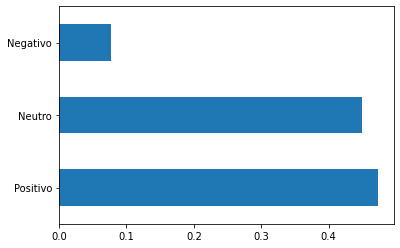

In [79]:
# Plotar frequência dos sentimentos
(Dados["Sentimento_Categorico"].value_counts() / Dados.shape[0]).plot(kind="barh")

<AxesSubplot:xlabel='Sentimentos_PreProcessados', ylabel='Ret_Pct'>

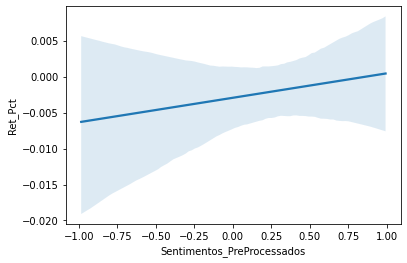

In [80]:
# Regression Plot 
regplot(x=Dados["Sentimentos_PreProcessados"], y=Dados["Ret_Pct"], scatter=False, fit_reg=True)

In [81]:
# Manter somente dados para 02/Mar até 02/Abr
Dados = Dados.loc["2022-03-02":"2022-04-02"]
Dados.index.min(), Dados.index.max()

(Timestamp('2022-03-02 04:00:00+0000', tz='UTC'),
 Timestamp('2022-04-02 22:00:00+0000', tz='UTC'))

In [82]:
# Criar variáveis Dummy para sentimento, sem coluna de neutro
Dummies = pd.get_dummies(Dados["Sentimento_Categorico"])
Dummies

,Negativo,Neutro,Positivo
Horario,,,
2022-03-02 04:00:00+00:00,0,1,0
2022-03-02 04:00:00+00:00,0,0,1
2022-03-02 04:00:00+00:00,0,1,0
2022-03-02 04:00:00+00:00,1,0,0
2022-03-02 04:00:00+00:00,0,0,1
...,...,...,...
2022-04-02 22:00:00+00:00,0,1,0
2022-04-02 22:00:00+00:00,0,1,0
2022-04-02 22:00:00+00:00,0,0,1


In [83]:
# Dados Com Dummies
Dados_Dummies = pd.concat([Dados, Dummies], axis="columns")
Dados_Dummies

,Tweets,Sentimento,Close,Retornos,Tweets_PreProcessados,Sentimentos_PreProcessados,Ret_Pct,Sentimento_Categorico,Negativo,Neutro,Positivo
Horario,,,,,,,,,,,
2022-03-02 04:00:00+00:00,"RT @BitcoinStimulus: $7,852 (+554%)\r\n\r\n#bi...",0.0000,44273.210938,-0.002187,rt bitcoinstimulus bitcoin,0.0000,-0.218694,Neutro,0,1,0
2022-03-02 04:00:00+00:00,@TheMoonCarl You say you’re willing to gain we...,0.5994,44273.210938,-0.002187,themooncarl say youre willing gain wealth know...,0.8555,-0.218694,Positivo,0,0,1
2022-03-02 04:00:00+00:00,RT @Cointelegraph: Some on-chain stats still b...,0.0000,44273.210938,-0.002187,rt cointelegraph onchain stats still bolster b...,0.0000,-0.218694,Neutro,0,1,0
2022-03-02 04:00:00+00:00,"RT @bre_jew: @bitcoin_brown omg, I'm getting f...",-0.5574,44273.210938,-0.002187,rt bre_jew bitcoin_brown omg im getting fired ...,-0.5574,-0.218694,Negativo,1,0,0
2022-03-02 04:00:00+00:00,RT @BTC_Archive: 💥El Salvador President: The i...,0.3400,44273.210938,-0.002187,rt btc_archive el salvador president intrinsic...,0.3400,-0.218694,Positivo,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-02 22:00:00+00:00,@DiarioBitcoin hola si estas buscando donde in...,0.0000,46140.714844,-0.002625,diariobitcoin hola si estas buscando donde inv...,0.0000,-0.262456,Neutro,0,1,0
2022-04-02 22:00:00+00:00,@KFost24 What do you think about the trend of ...,0.0000,46140.714844,-0.002625,kfost think trend bitcoin,0.0000,-0.262456,Neutro,0,1,0
2022-04-02 22:00:00+00:00,RT @EllaHunt: my sweet sweet artist brother’s ...,0.3595,46140.714844,-0.002625,rt ellahunt sweet sweet artist brother insta a...,0.5574,-0.262456,Positivo,0,0,1


In [84]:
# Agrupar retornos por data e hora
Retorno_Hora = Dados_Dummies.groupby([Dados.index.day, Dados.index.hour])["Ret_Pct"].mean()

# Precos agrupados
Preco_Hora = Dados_Dummies.groupby([Dados.index.day, Dados.index.hour])["Close"].mean()

# Agrupar por dia e hora e calcular a soma dos sentimentos para cada substrato de tempo
Sent_Hora = Dados.groupby([Dados.index.day, Dados.index.hour])["Sentimentos_PreProcessados"].sum()

# Agrupar sentimentos positivos para valor mais frequente
Positivos = Dados_Dummies.groupby([Dados.index.day, Dados.index.hour])["Positivo"].agg(lambda x:x.value_counts().index[0])

# Agrupar sentimentos Negativos para valor mais frequente
Negativos = Dados_Dummies.groupby([Dados.index.day, Dados.index.hour])["Negativo"].agg(lambda x:x.value_counts().index[0])

# Agrupar Neutros
Neutros = Dados_Dummies.groupby([Dados.index.day, Dados.index.hour])["Neutro"].agg(lambda x:x.value_counts().index[0])

In [85]:
Dados_Agg = pd.concat([Preco_Hora, Retorno_Hora, Sent_Hora ,Positivos, Negativos, Neutros], axis="columns")
Dados_Agg

Close   Ret_Pct  Sentimentos_PreProcessados  Positivo  \
Horario Horario                                                                 
1       0        45597.730469  0.105774                     57.0284         1   
        1        45128.664062 -1.028706                     25.6996         0   
        2        44432.628906 -1.542335                     31.6333         1   
        3        44573.257812  0.316499                     19.8053         0   
        4        44754.609375  0.406862                     20.9343         0   
...                       ...       ...                         ...       ...   
31      18       45950.597656  0.171051                     96.0580         0   
        19       45678.164062 -0.592884                     90.1268         0   
        20       45801.089844  0.269113                     71.0084         0   
        21       45843.117188  0.091761                    129.7472         1   
        22       45831.972656 -0.024310                     89.3656         0   

                 Negativo  Neutro  
Horario Horario                    
1       0               0       0  
        1               0       0  
        2               0       0  
        3               0       1  
        4               0       0  
...                   ...     ...  
31      18              0       0  
        19              0       0  
        20              0       0  
        21              0       0  
        22              0       0  

[713 rows x 6 columns]

In [86]:
print("Positivos, Negativos, Neutros (Horas)")
Dados_Agg[Dados_Agg["Positivo"] == 1].count()[3], Dados_Agg[Dados_Agg["Negativo"] == 1].count()[4], Dados_Agg[Dados_Agg["Neutro"] == 1].count()[5]

Positivos, Negativos, Neutros (Horas)


(251, 0, 193)

In [87]:
# Renomear índices
Dados_Agg.index.set_names(["Dia", "Hora"], inplace=True)
Dados_Agg

Close   Ret_Pct  Sentimentos_PreProcessados  Positivo  \
Dia Hora                                                                 
1   0     45597.730469  0.105774                     57.0284         1   
    1     45128.664062 -1.028706                     25.6996         0   
    2     44432.628906 -1.542335                     31.6333         1   
    3     44573.257812  0.316499                     19.8053         0   
    4     44754.609375  0.406862                     20.9343         0   
...                ...       ...                         ...       ...   
31  18    45950.597656  0.171051                     96.0580         0   
    19    45678.164062 -0.592884                     90.1268         0   
    20    45801.089844  0.269113                     71.0084         0   
    21    45843.117188  0.091761                    129.7472         1   
    22    45831.972656 -0.024310                     89.3656         0   

          Negativo  Neutro  
Dia Hora                    
1   0            0       0  
    1            0       0  
    2            0       0  
    3            0       1  
    4            0       0  
...            ...     ...  
31  18           0       0  
    19           0       0  
    20           0       0  
    21           0       0  
    22           0       0  

[713 rows x 6 columns]

In [ ]:
# Exportar dataframe com valores agregados
Dados_Dummies.to_csv("Data/Dados_Tratados.csv")
Dados_Agg.to_csv("Data/Dados_Agregados.csv")